In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Groceries_dataset.csv")

In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
df['itemDescription'].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [7]:
df.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

<AxesSubplot:>

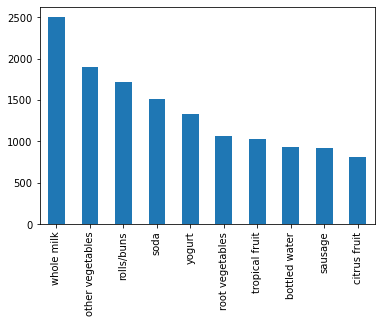

In [8]:
df['itemDescription'].value_counts().head(10).plot.bar()

<AxesSubplot:>

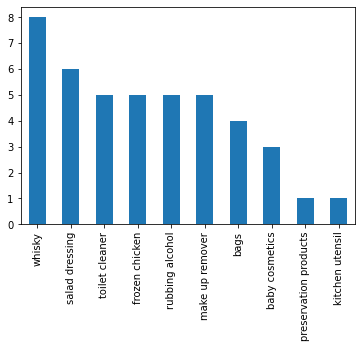

In [9]:
df['itemDescription'].value_counts().tail(10).plot.bar()

In [10]:
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].unique().reset_index()

In [11]:
transactions

,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"
...,...,...,...
14958,4999,24-01-2015,"[tropical fruit, berries, other vegetables, yo..."
14959,4999,26-12-2015,"[bottled water, herbs]"
14960,5000,09-03-2014,"[fruit/vegetable juice, onions]"
14961,5000,10-02-2015,"[soda, root vegetables, semi-finished bread]"


In [12]:
item = list(transactions['itemDescription'])

In [13]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [14]:
fit = TransactionEncoder().fit(item)

In [15]:
trans = fit.transform(item)

In [16]:
df1 = pd.DataFrame(trans,columns = fit.columns_)

In [17]:
df1

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
apriori = apriori(df1,min_support = 0.002,use_colnames = True)

In [19]:
association = association_rules(apriori,metric = 'lift',min_threshold = 1)

In [20]:
association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899,1.303311e-05,1.000682
1,(other vegetables),(berries),0.122101,0.021787,0.002673,0.021894,1.004899,1.303311e-05,1.000109
2,(bottled beer),(sausage),0.045312,0.060349,0.003342,0.073746,1.222000,6.070623e-04,1.014464
3,(sausage),(bottled beer),0.060349,0.045312,0.003342,0.055371,1.222000,6.070623e-04,1.010649
4,(brown bread),(canned beer),0.037626,0.046916,0.002406,0.063943,1.362937,6.406768e-04,1.018191
5,(canned beer),(brown bread),0.046916,0.037626,0.002406,0.051282,1.362937,6.406768e-04,1.014394
6,(brown bread),(pastry),0.037626,0.051728,0.002005,0.053286,1.030127,5.863558e-05,1.001646
7,(pastry),(brown bread),0.051728,0.037626,0.002005,0.038760,1.030127,5.863558e-05,1.001179
8,(chocolate),(rolls/buns),0.023592,0.110005,0.002807,0.118980,1.081592,2.117455e-04,1.010188
9,(rolls/buns),(chocolate),0.110005,0.023592,0.002807,0.025516,1.081592,2.117455e-04,1.001975
